In [11]:

import datetime
import time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('UCI_Credit_Card.csv', delimiter=',')
df.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- ID: An identification number assigned to each individual.
- LIMIT_BAL: The amount of available credit (in NT dollar). Includes both individual and family/supplementary credit.
- SEX: Gender (1 = male, 2 = female).
- EDUCATION: Level of education (1 = graduate school, 2 = university, 3 = high school, 4 = others).
- MARRIAGE: Marital status (1 = married, 2 = single, 3 = others).
- AGE: Age in years.
- PAY_0, PAY_2, ..., PAY_6: Repayment status in past months. The scale is from -1 to 9, where -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... , 9 = payment delay for nine months and above.
- BILL_AMT1, BILL_AMT2, ..., BILL_AMT6: Amount of bill statement (in NT dollar).
- PAY_AMT1, PAY_AMT2, ..., PAY_AMT6: Amount of previous payment (in NT dollar).
- default.payment.next.month: Default payment for the next month (1 = yes, 0 = no).

In [24]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [25]:
summary_stats = df.describe()
summary_stats

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


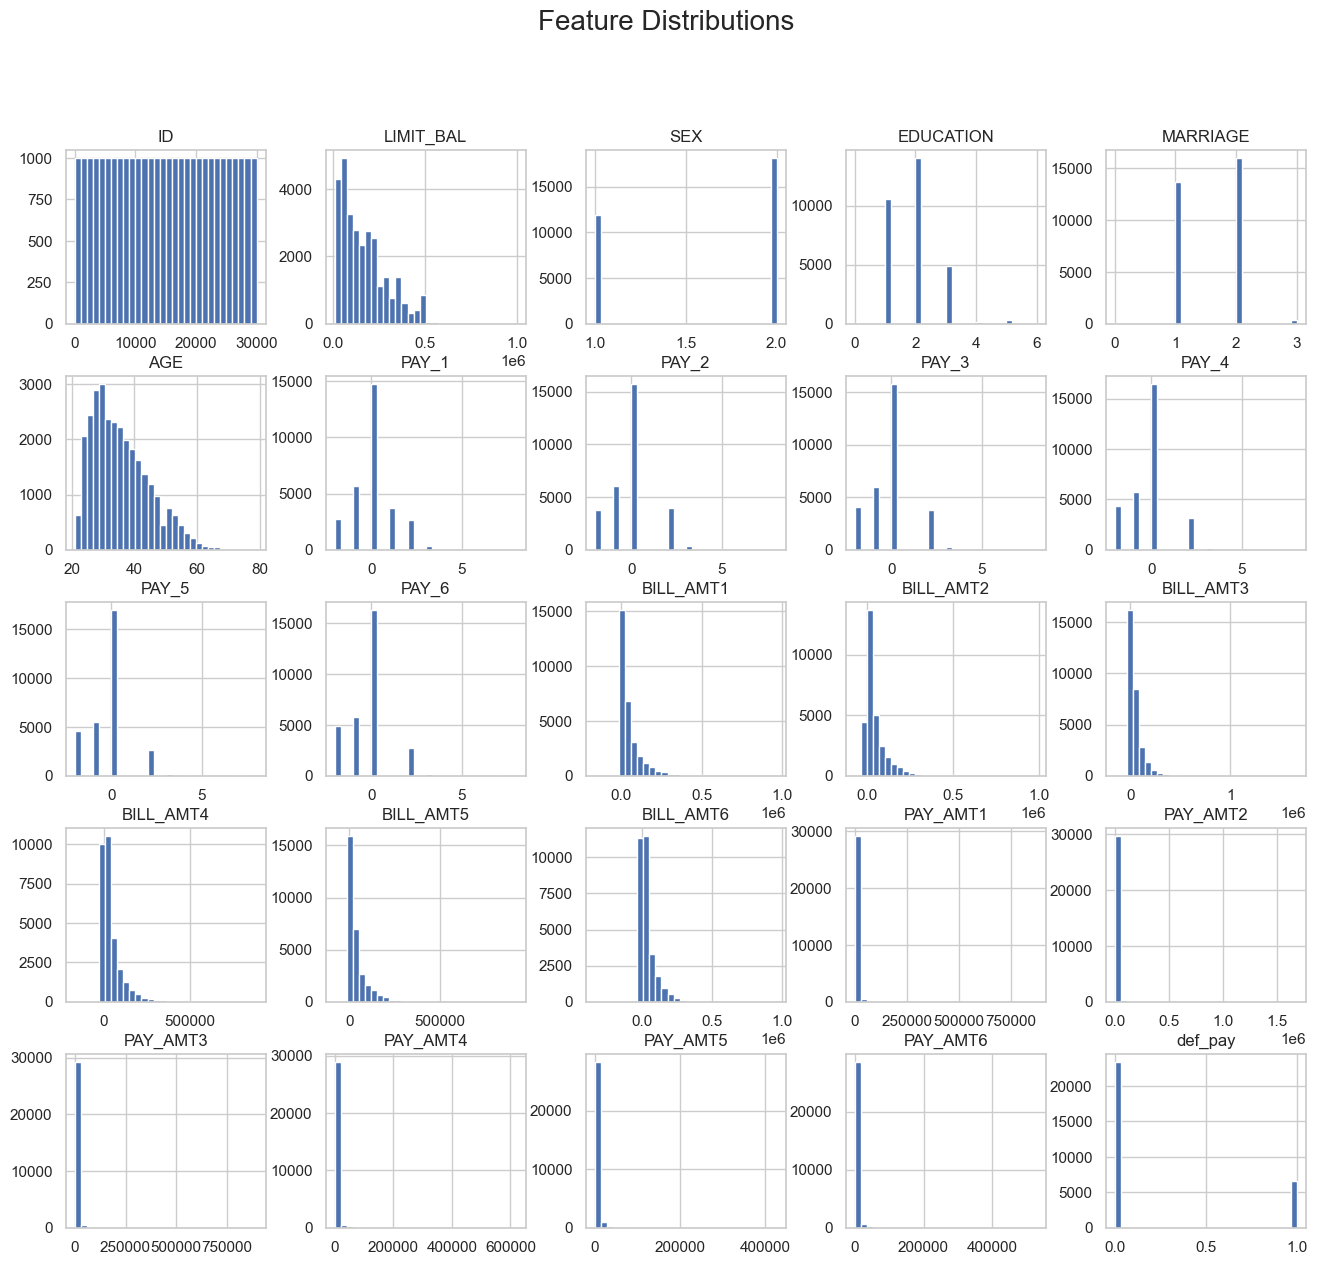

In [26]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Draw histograms for each feature
df.hist(figsize=(16, 14), bins=30)
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()


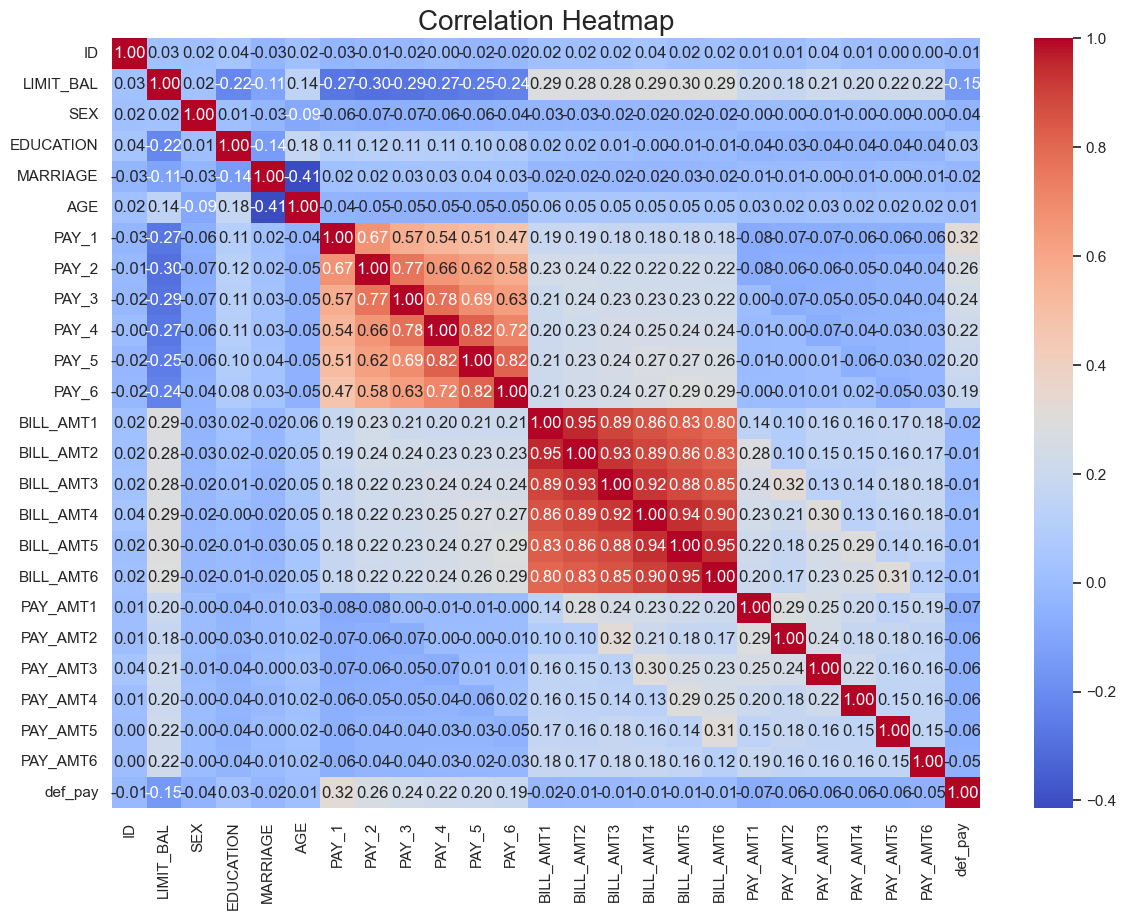

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=20)

plt.show()

In [30]:
# Focus on these columns
# Domain Expertise
cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'def_pay']

# The pairwise correlations
df[cols].corr()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,def_pay
SEX,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.033642,-0.031183,-0.039961
EDUCATION,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.023581,0.018749,0.028006
MARRIAGE,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,-0.023472,-0.021602,-0.024339
AGE,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,0.056239,0.054283,0.013890
PAY_1,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.187068,0.189859,0.324794
PAY_2,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.234887,0.235257,0.263551
BILL_AMT1,-0.033642,0.023581,-0.023472,0.056239,0.187068,0.234887,1.000000,0.951484,-0.019644
BILL_AMT2,-0.031183,0.018749,-0.021602,0.054283,0.189859,0.235257,0.951484,1.000000,-0.014193
def_pay,-0.039961,0.028006,-0.024339,0.013890,0.324794,0.263551,-0.019644,-0.014193,1.000000


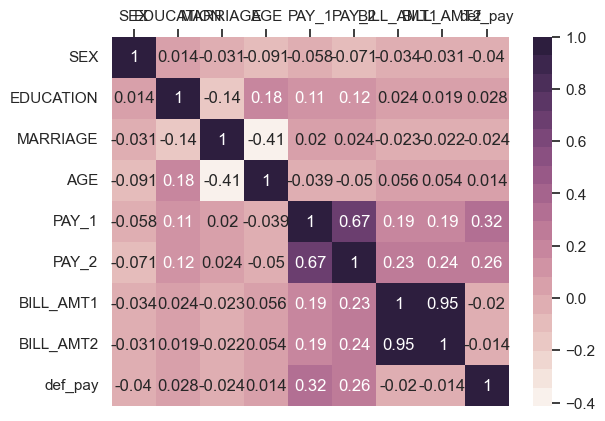

In [31]:

ax = sns.heatmap(
    df[cols].corr(),annot=True,
    cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15),
)
ax.xaxis.tick_top() # move labels to the top


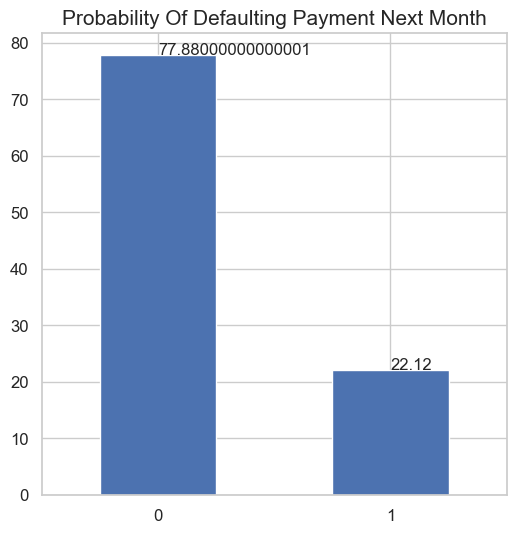

In [32]:
def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

C:\Users\sgnka\AppData\Local\Temp\ipykernel_19796\3263890886.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
C:\Users\sgnka\AppData\Local\Temp\ipykernel_19796\3263890886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LIMIT_BAL)
C:\Users\sgnka\AppData\Local\Temp\ipykernel_19796\3263890886.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

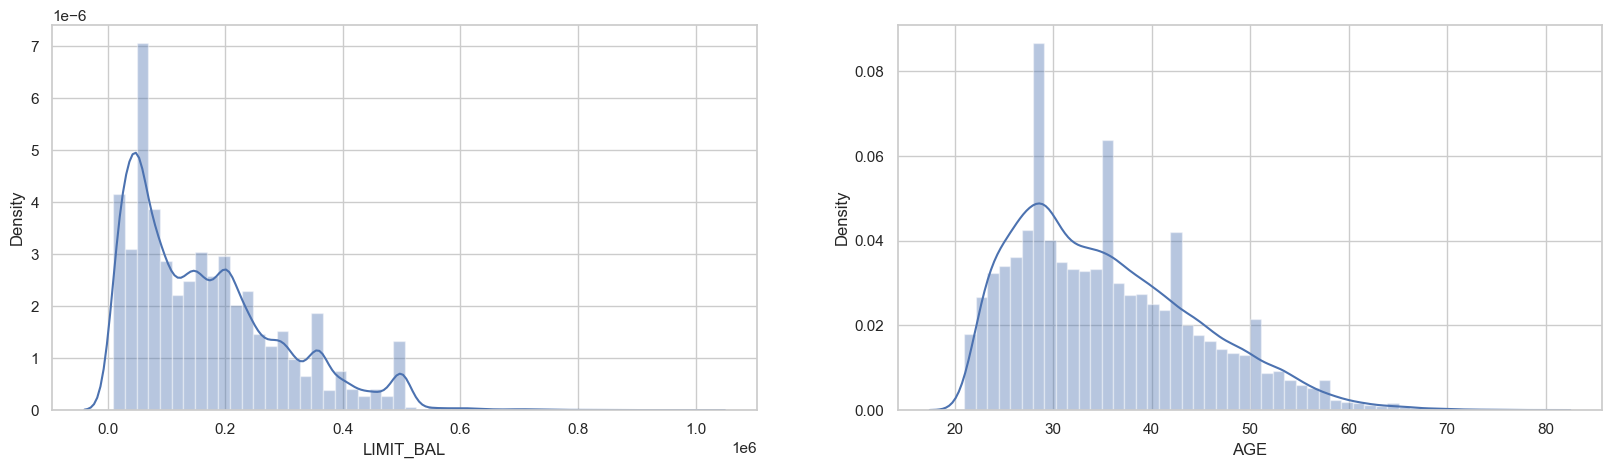

In [33]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

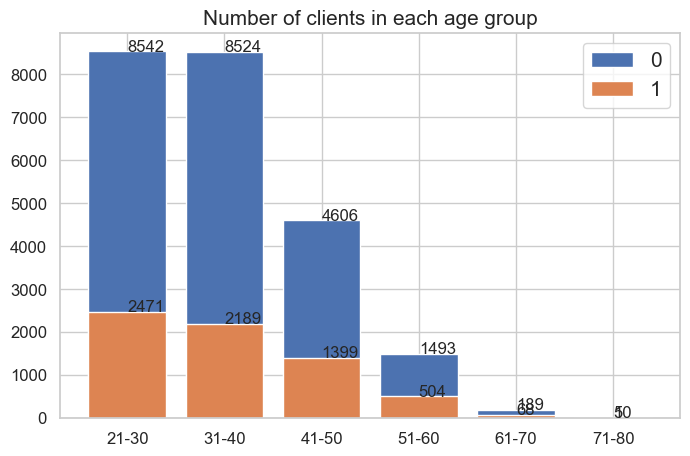

In [35]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['def_pay'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [60]:
df.drop('AGE_BIN', axis=1, inplace=True)

# Modelling

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df_X = df.drop(['def_pay'], axis=1)
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


In [63]:
df_X = df.drop(['def_pay','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

#

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


As we can see even now the accuracy does not change

In [47]:
df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

Test Accuracy Score for model4:  0.778

Train Accuracy Score for model4:  0.7788888888888889


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

# Creating the Decision Tree model

clf = DecisionTreeClassifier(random_state=42, )

# Fitting the model to the training data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)


# Evaluating the model
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for Deecision Tree: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for Deecision Tree: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6968
           1       0.39      0.38      0.39      2032

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.72      0.72      0.72      9000

[[5747 1221]
 [1256  776]]

Test Accuracy Score for Deecision Tree:  0.7247777777777777

Train Accuracy Score for Deecision Tree:  0.9863333333333333


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

# Creating the Decision Tree model

clf = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=50)

# Fitting the model to the training data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)


# Evaluating the model
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for Deecision Tree: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for Deecision Tree: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7961
           1       0.35      0.68      0.47      1039

    accuracy                           0.82      9000
   macro avg       0.65      0.76      0.68      9000
weighted avg       0.88      0.82      0.84      9000

[[6672 1289]
 [ 331  708]]

Test Accuracy Score for Deecision Tree:  0.82

Train Accuracy Score for Deecision Tree:  0.8206666666666667


In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
features = ['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']
# Plotting the Decision Tree (Limited depth for better visibility)
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(clf, max_depth=3, feature_names=features, class_names=['Not Default', 'Default'], filled=True)
plt.show()